In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [ ]:
# Test_Beneficiarydata-1542969243754.csv
# Test_Inpatientdata-1542969243754.csv
# Test_Outpatientdata-1542969243754.csv
# Test-1542969243754.csv
# Train_Beneficiarydata-1542865627584.csv
# Train_Inpatientdata-1542865627584.csv
# Train_Outpatientdata-1542865627584.csv
# Train-1542865627584.csv

In [2]:
train = pd.read_csv('Train-1542865627584.csv')

In [3]:
print(train.shape)
train.head(10)

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
5,PRV51008,No
6,PRV51011,No
7,PRV51012,No
8,PRV51013,No
9,PRV51014,No


In [4]:
#how many unique providers do we have
len(train.Provider.unique())

5410

In [5]:
train.PotentialFraud.value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

Text(0.95, 300, '$506$')

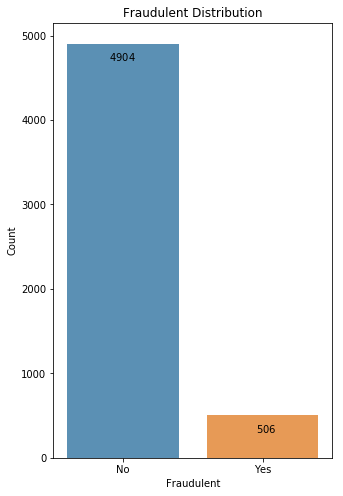

In [6]:
plt.figure(figsize=(5,8))
sns.barplot(train.PotentialFraud.value_counts().index, train.PotentialFraud.value_counts().values, alpha=0.8)
plt.title('Fraudulent Distribution')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.text(-0.1, 4700, r'$4904$')
plt.text(0.95, 300, r'$506$')
# plt.show()

### Beneficiary Info

In [7]:
tr_ben = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
print(tr_ben.shape)
tr_ben.head()

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [8]:
print(len(tr_ben.columns))
tr_ben.columns

25


Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [9]:
tr_ben.Race.value_counts()

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

Text(0, 0.5, 'Count')

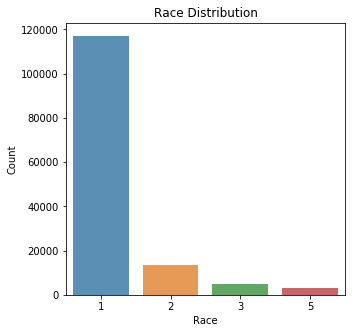

In [10]:
plt.figure(figsize=(5,5))
sns.barplot(tr_ben.Race.value_counts().index, tr_ben.Race.value_counts().values, alpha=0.8)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
# plt.show()

In [11]:
tr_ben.Gender.value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

Text(0, 0.5, 'Count')

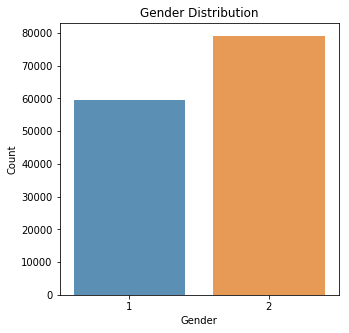

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(tr_ben.Gender.value_counts().index, tr_ben.Gender.value_counts().values, alpha=0.8)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
# plt.show()

2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64


Text(0, 0.5, 'Count')

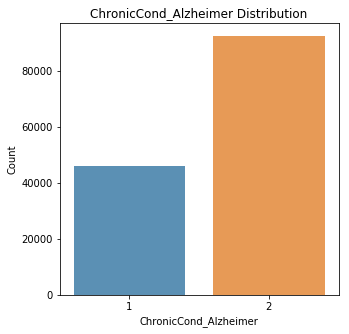

In [9]:
print(tr_ben.ChronicCond_Alzheimer.value_counts())
plt.figure(figsize=(5,5))
sns.barplot(tr_ben.ChronicCond_Alzheimer.value_counts().index, tr_ben.ChronicCond_Alzheimer.value_counts().values, alpha=0.8)
plt.title('ChronicCond_Alzheimer Distribution')
plt.xlabel('ChronicCond_Alzheimer')
plt.ylabel('Count')
# plt.show()

In [7]:
chronic = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']

In [16]:
for chron in chronic:
    print(chron)
    print(tr_ben[chron].value_counts())

ChronicCond_Alzheimer
2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64
ChronicCond_Heartfailure
2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64
ChronicCond_KidneyDisease
2    95277
1    43279
Name: ChronicCond_KidneyDisease, dtype: int64
ChronicCond_Cancer
2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64
ChronicCond_ObstrPulmonary
2    105697
1     32859
Name: ChronicCond_ObstrPulmonary, dtype: int64
ChronicCond_Depression
2    89296
1    49260
Name: ChronicCond_Depression, dtype: int64
ChronicCond_Diabetes
1    83391
2    55165
Name: ChronicCond_Diabetes, dtype: int64
ChronicCond_IschemicHeart
1    93644
2    44912
Name: ChronicCond_IschemicHeart, dtype: int64
ChronicCond_Osteoporasis
2    100497
1     38059
Name: ChronicCond_Osteoporasis, dtype: int64
ChronicCond_rheumatoidarthritis
2    102972
1     35584
Name: ChronicCond_rheumatoidarthritis, dtype: int64
ChronicCond_stroke
2    127602
1     10954
Name: ChronicCond_stroke, dtype: int6

2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64
2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64
2    95277
1    43279
Name: ChronicCond_KidneyDisease, dtype: int64
2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64
2    105697
1     32859
Name: ChronicCond_ObstrPulmonary, dtype: int64
2    89296
1    49260
Name: ChronicCond_Depression, dtype: int64
1    83391
2    55165
Name: ChronicCond_Diabetes, dtype: int64
1    93644
2    44912
Name: ChronicCond_IschemicHeart, dtype: int64
2    100497
1     38059
Name: ChronicCond_Osteoporasis, dtype: int64
2    102972
1     35584
Name: ChronicCond_rheumatoidarthritis, dtype: int64
2    127602
1     10954
Name: ChronicCond_stroke, dtype: int64


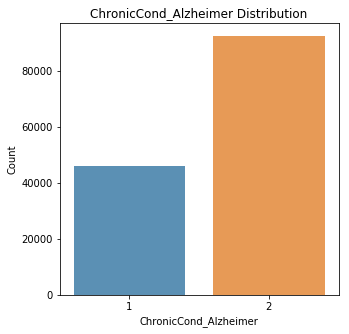

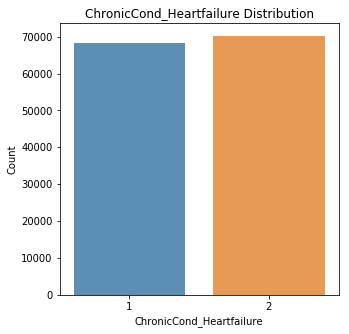

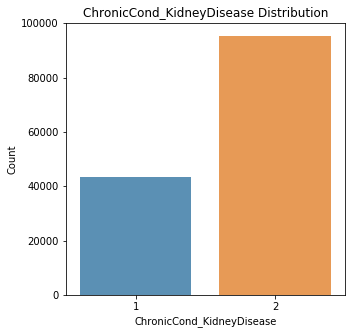

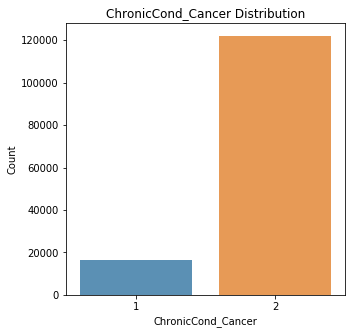

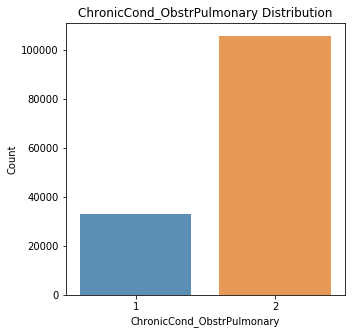

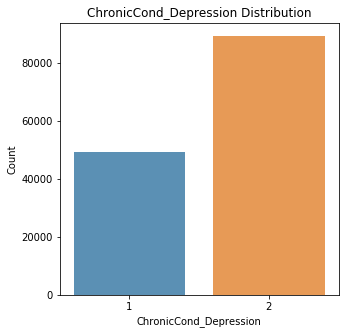

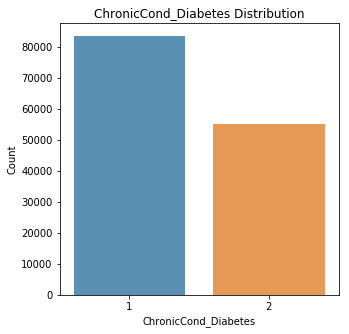

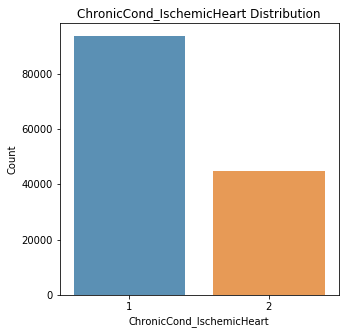

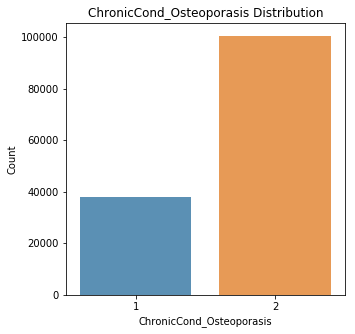

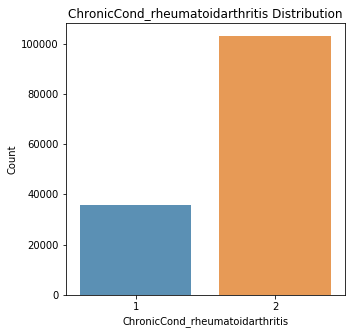

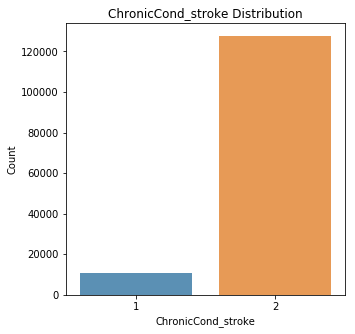

In [19]:
for chron in chronic:
    print(tr_ben[chron].value_counts())
    plt.figure(figsize=(5,5))
    sns.barplot(tr_ben[chron].value_counts().index, tr_ben[chron].value_counts().values, alpha=0.8)
    plt.title('{} Distribution'.format(chron))
    plt.ylabel('Count')
    plt.xlabel('{}'.format(chron))

In [13]:
tr_ben.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [14]:
tr_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
BeneID                             138556 non-null object
DOB                                138556 non-null object
DOD                                1421 non-null object
Gender                             138556 non-null int64
Race                               138556 non-null int64
RenalDiseaseIndicator              138556 non-null object
State                              138556 non-null int64
County                             138556 non-null int64
NoOfMonths_PartACov                138556 non-null int64
NoOfMonths_PartBCov                138556 non-null int64
ChronicCond_Alzheimer              138556 non-null int64
ChronicCond_Heartfailure           138556 non-null int64
ChronicCond_KidneyDisease          138556 non-null int64
ChronicCond_Cancer                 138556 non-null int64
ChronicCond_ObstrPulmonary         138556 non-null int64
ChronicCond_Depression          

In [15]:
tr_ben['BeneID'].nunique()

138556

In [16]:
tr_ben.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [17]:
tr_ben['DOB'] = pd.to_datetime(tr_ben['DOB'])
tr_ben['DOD'] = pd.to_datetime(tr_ben['DOD'])

In [18]:
tr_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
BeneID                             138556 non-null object
DOB                                138556 non-null datetime64[ns]
DOD                                1421 non-null datetime64[ns]
Gender                             138556 non-null int64
Race                               138556 non-null int64
RenalDiseaseIndicator              138556 non-null object
State                              138556 non-null int64
County                             138556 non-null int64
NoOfMonths_PartACov                138556 non-null int64
NoOfMonths_PartBCov                138556 non-null int64
ChronicCond_Alzheimer              138556 non-null int64
ChronicCond_Heartfailure           138556 non-null int64
ChronicCond_KidneyDisease          138556 non-null int64
ChronicCond_Cancer                 138556 non-null int64
ChronicCond_ObstrPulmonary         138556 non-null int64
ChronicCond_Depr

In [19]:
tr_ben['DOB'].describe()

count                  138556
unique                    900
top       1939-10-01 00:00:00
freq                      540
first     1909-01-01 00:00:00
last      1983-12-01 00:00:00
Name: DOB, dtype: object

In [20]:
tr_ben['DOD'].describe()

count                    1421
unique                     11
top       2009-12-01 00:00:00
freq                      182
first     2009-02-01 00:00:00
last      2009-12-01 00:00:00
Name: DOD, dtype: object

In [21]:
tr_ben['Age'] = round((tr_ben['DOD'] - tr_ben['DOB']).dt.days/365)
tr_ben['Age'].describe()

count    1421.000000
mean       74.641802
std        10.662646
min        36.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       100.000000
Name: Age, dtype: float64

In [22]:
tr_ben['Age'].head(10)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6    69.0
7     NaN
8     NaN
9     NaN
Name: Age, dtype: float64

no DOD?  assume year is 2009

In [23]:
tr_ben['DOB'][200]

Timestamp('1930-07-01 00:00:00')

In [24]:
pd.to_datetime('2009-12-01')

Timestamp('2009-12-01 00:00:00')

In [25]:
pd.to_datetime('2009-12-01') - tr_ben['DOB'][200]

Timedelta('29008 days 00:00:00')

In [26]:
(pd.to_datetime('2009-12-01') - tr_ben['DOB'][200]).days/365

79.47397260273972

In [27]:
type((pd.to_datetime('2009-12-01') - tr_ben['DOB'][200]).days/365)

float

In [28]:
round((pd.to_datetime('2009-12-01') - tr_ben['DOB'][200]).days/365)

79

In [29]:
tr_ben['Age'].fillna(round((pd.to_datetime('2009-12-01') - tr_ben['DOB']).dt.days/365), inplace=True)

In [30]:
tr_ben['Age'].head(10)

0    67.0
1    73.0
2    73.0
3    87.0
4    74.0
5    33.0
6    69.0
7    76.0
8    81.0
9    73.0
Name: Age, dtype: float64

In [31]:
tr_ben.Age.describe()

count    138556.000000
mean         73.622831
std          12.733335
min          26.000000
25%          68.000000
50%          74.000000
75%          82.000000
max         101.000000
Name: Age, dtype: float64

/Users/fhel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


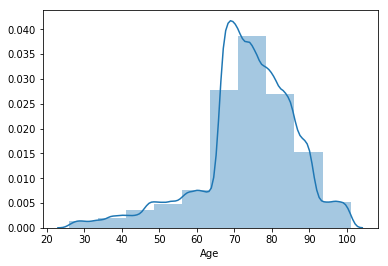

In [32]:
sns.distplot(tr_ben.Age, bins=10)
# sns.distplot(tr_inout.InscClaimAmtReimbursed, bins=10)

In [35]:
tr_ben['Deceased'] = np.where(tr_ben['DOD'].isnull(), 0, 1)

0    137135
1      1421
Name: Deceased, dtype: int64


Text(0, 0.5, 'Count')

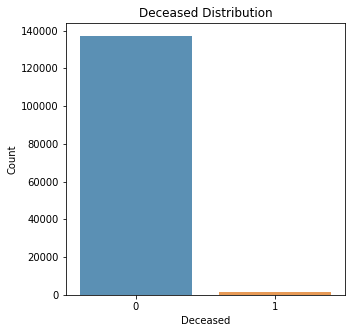

In [20]:
print(tr_ben.Deceased.value_counts())
plt.figure(figsize=(5,5))
sns.barplot(tr_ben.Deceased.value_counts().index, tr_ben.Deceased.value_counts().values, alpha=0.8)
plt.title('Deceased Distribution')
plt.xlabel('Deceased')
plt.ylabel('Count')
# plt.show()

In [38]:
tr_ben.head(7)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,2,1,1,36000,3204,60,70,67.0,0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,2,2,2,2,0,0,30,50,73.0,0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,1,2,2,2,0,0,90,40,73.0,0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,2,0,0,1810,760,87.0,0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,2,2,2,2,0,0,1790,1200,74.0,0
5,BENE11006,1976-09-01,NaT,2,1,0,23,810,12,12,...,2,2,2,2,0,0,500,0,33.0,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,1,2,0,0,1490,160,69.0,1


In [50]:
tr_ben.loc[tr_ben.DOD.notna()]

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,1,2,0,0,1490,160,69.0,1
206,BENE11217,1939-07-01,2009-09-01,1,3,Y,5,160,12,12,...,1,1,1,2,0,0,3880,650,70.0,1
207,BENE11218,1928-12-01,2009-09-01,1,1,0,14,141,12,12,...,1,1,2,1,19000,1068,110,50,81.0,1
219,BENE11231,1937-12-01,2009-05-01,2,2,0,45,810,12,12,...,1,1,2,2,4000,1068,300,30,71.0,1
525,BENE11558,1927-12-01,2009-12-01,2,1,0,14,141,12,12,...,1,2,2,2,0,0,50,80,82.0,1
629,BENE11667,1942-05-01,2009-07-01,1,1,0,38,330,12,12,...,1,2,2,2,0,0,620,50,67.0,1
692,BENE11734,1929-04-01,2009-12-01,1,1,0,25,760,12,12,...,2,2,2,2,0,0,30,20,81.0,1
731,BENE11775,1910-08-01,2009-08-01,2,1,0,3,60,12,12,...,1,2,2,2,0,0,110,90,99.0,1
810,BENE11859,1926-01-01,2009-10-01,2,1,0,33,370,12,12,...,1,2,2,2,0,0,270,1210,84.0,1
825,BENE11874,1937-12-01,2009-05-01,1,1,0,31,270,12,12,...,1,1,1,2,0,0,90,0,71.0,1


In [51]:
tr_ben.to_csv('tr_ben.csv', index=False)

In [53]:
tr_ben.corr()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
Gender,1.000000,0.002007,0.006893,0.004328,0.010458,0.010227,-0.017997,-0.008754,-0.005936,0.013080,...,-0.005754,-0.018978,-0.013450,-0.002649,0.001782,-0.000235,0.007061,0.007625,0.101352,0.001550
Race,0.002007,1.000000,-0.049890,-0.003733,-0.005861,-0.002314,-0.000040,0.004511,-0.000500,0.013700,...,0.012074,0.007452,0.003813,0.003988,-0.003996,-0.004254,0.004534,0.001040,-0.088645,0.001333
State,0.006893,-0.049890,1.000000,0.130760,-0.001929,0.002039,0.000013,-0.001845,-0.001041,0.005807,...,-0.000245,0.001195,0.002377,0.001879,-0.000945,-0.004090,-0.001934,-0.002477,-0.015447,-0.002877
County,0.004328,-0.003733,0.130760,1.000000,0.008324,0.007647,-0.009674,-0.009122,-0.011088,-0.000427,...,-0.007747,-0.006901,-0.004349,-0.001237,0.001527,0.002320,0.005160,0.005083,-0.007374,0.002718
NoOfMonths_PartACov,0.010458,-0.005861,-0.001929,0.008324,1.000000,0.240054,-0.021567,-0.022369,-0.019437,-0.005501,...,-0.025002,-0.013483,-0.018906,-0.006938,-0.001053,0.004705,0.011525,0.013331,0.020219,-0.000477
NoOfMonths_PartBCov,0.010227,-0.002314,0.002039,0.007647,0.240054,1.000000,-0.021601,-0.031268,-0.027689,-0.013597,...,-0.043540,-0.024469,-0.023054,-0.012684,0.003607,0.008353,0.017700,0.020778,0.026236,0.004258
ChronicCond_Alzheimer,-0.017997,-0.000040,0.000013,-0.009674,-0.021567,-0.021601,1.000000,0.201979,0.197602,0.057621,...,0.170700,0.090578,0.106438,0.133754,-0.126100,-0.157013,-0.091980,-0.097755,-0.031834,-0.012619
ChronicCond_Heartfailure,-0.008754,0.004511,-0.001845,-0.009122,-0.022369,-0.031268,0.201979,1.000000,0.309772,0.086930,...,0.289732,0.101362,0.145553,0.141573,-0.181765,-0.195562,-0.147488,-0.152361,-0.052056,-0.010099
ChronicCond_KidneyDisease,-0.005936,-0.000500,-0.001041,-0.011088,-0.019437,-0.027689,0.197602,0.309772,1.000000,0.116531,...,0.249356,0.104806,0.160158,0.151812,-0.270505,-0.271754,-0.206305,-0.214022,-0.039244,-0.005277
ChronicCond_Cancer,0.013080,0.013700,0.005807,-0.000427,-0.005501,-0.013597,0.057621,0.086930,0.116531,1.000000,...,0.095893,0.051980,0.065152,0.043382,-0.092881,-0.091316,-0.072572,-0.081853,-0.030005,-0.008938


In [54]:
tr_ben.shape

(138556, 27)

In [5]:
tr_ben = pd.read_csv('tr_ben.csv')

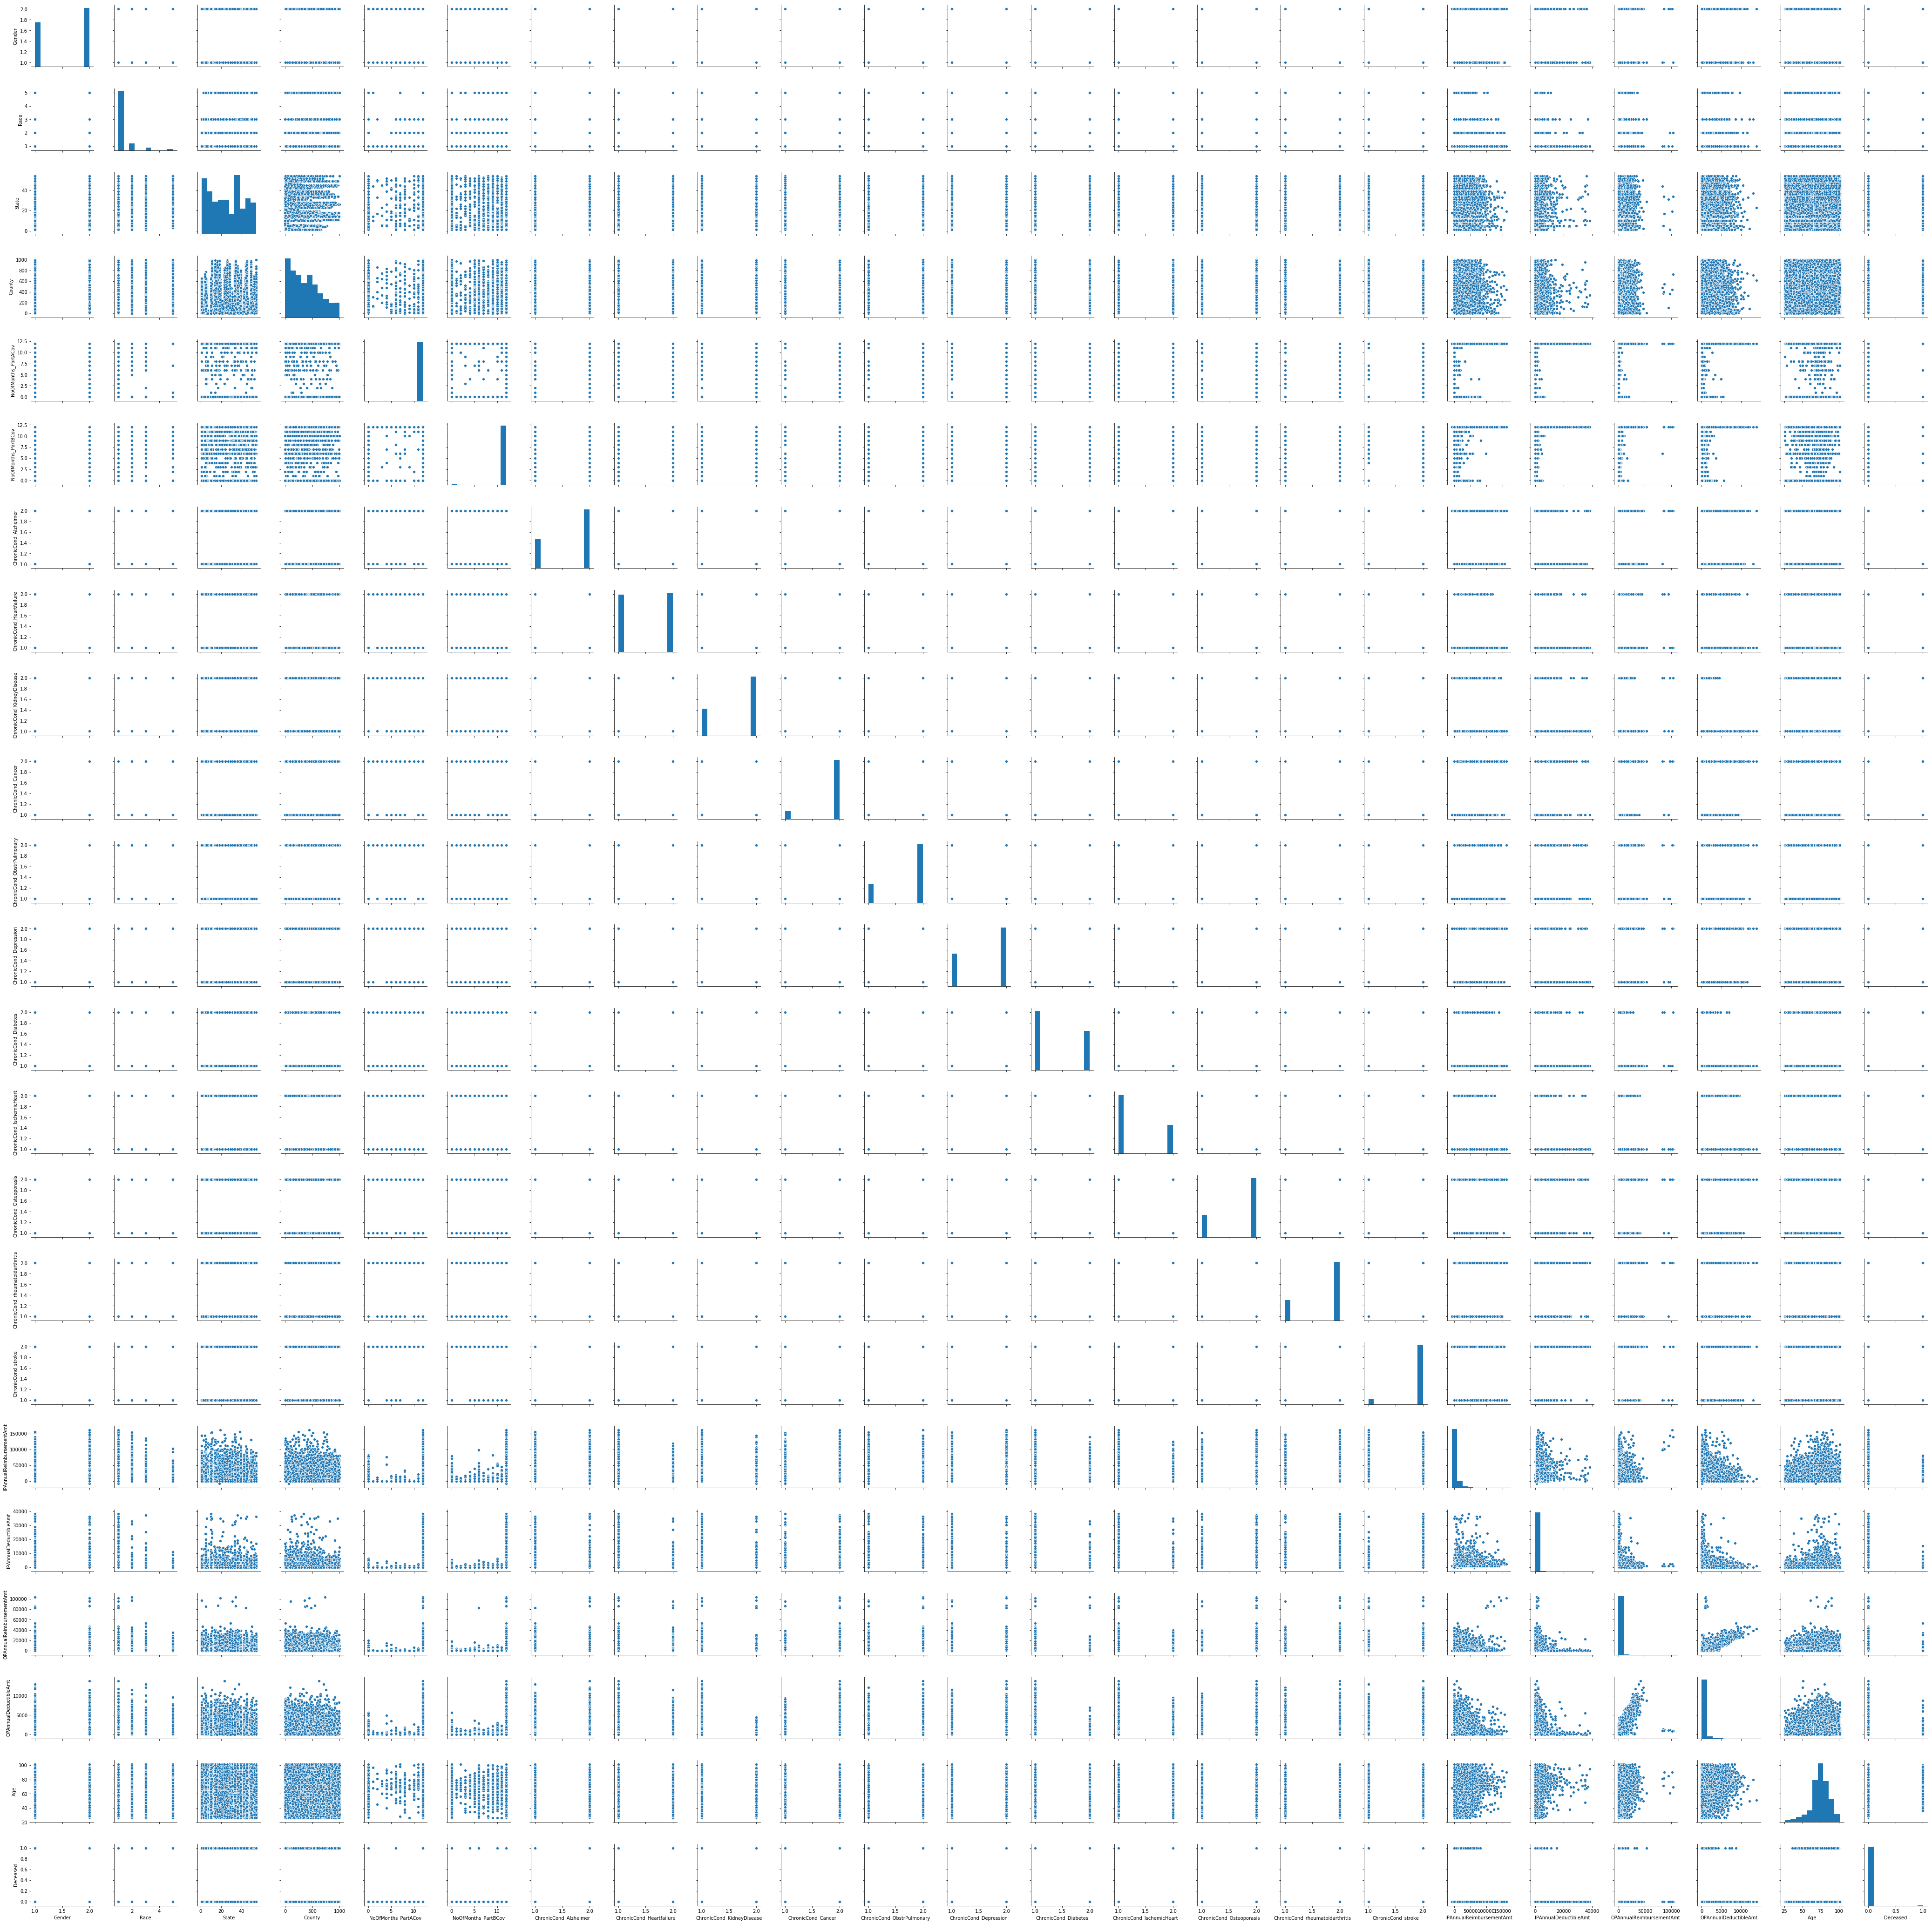

In [6]:
sns.pairplot(tr_ben)

In [23]:
dep = tr_ben.loc[tr_ben.ChronicCond_Depression==1]
dep.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,2,1,1,36000,3204,60,70,67.0,0
10,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,2,2,1,1,5000,1068,250,320,96.0,0
11,BENE11012,1934-05-01,NaN,1,1,0,14,982,12,12,...,1,1,1,2,0,0,2890,1740,76.0,0
12,BENE11013,1927-12-01,NaN,2,1,0,7,10,12,12,...,2,2,2,2,0,0,440,600,82.0,0
13,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,2,2,21260,2136,120,100,72.0,0


In [30]:
dep.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'Deceased'],
      dtype='object')

In [36]:
dep[['ChronicCond_Depression', 'Age']].head()

,ChronicCond_Depression,Age
0,1,67.0
10,1,96.0
11,1,76.0
12,1,82.0
13,1,72.0


In [40]:
dep[['ChronicCond_Depression', 'Age']].describe()

,ChronicCond_Depression,Age
count,49260.0,49260.000000
mean,1.0,73.508384
std,0.0,13.558229
min,1.0,26.000000
25%,1.0,68.000000
50%,1.0,75.000000
75%,1.0,83.000000
max,1.0,101.000000


In [28]:
dep.Age.describe()

count    49260.000000
mean        73.508384
std         13.558229
min         26.000000
25%         68.000000
50%         75.000000
75%         83.000000
max        101.000000
Name: Age, dtype: float64

/Users/fhel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


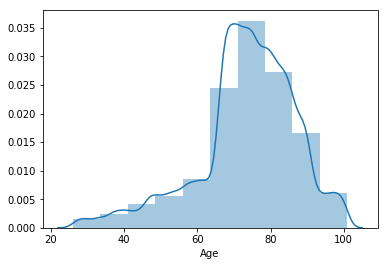

In [26]:
sns.distplot(dep.Age, bins=10)
# sns.distplot(tr_inout.InscClaimAmtReimbursed, bins=10)

In [42]:
ndep = tr_ben.loc[tr_ben.ChronicCond_Depression==2]
ndep.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,0,0,30,50,73.0,0
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,1,2,2,2,0,0,90,40,73.0,0
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,1,1,1,2,0,0,1810,760,87.0,0
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,2,2,2,0,0,1790,1200,74.0,0
5,BENE11006,1976-09-01,NaN,2,1,0,23,810,12,12,...,2,2,2,2,0,0,500,0,33.0,0


In [43]:
ndep.Age.describe()

count    89296.000000
mean        73.685966
std         12.254163
min         26.000000
25%         68.000000
50%         74.000000
75%         82.000000
max        101.000000
Name: Age, dtype: float64

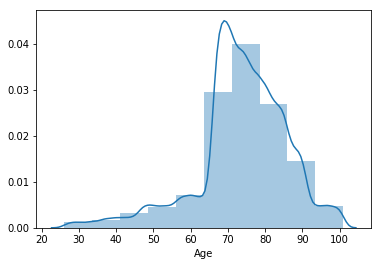

In [44]:
sns.distplot(ndep.Age, bins=10)

### Inpatient Info

### Outpatient Info

In [17]:
tr_out = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
print(len(tr_out))
tr_out.head()

517737


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [18]:
tr_out['Inpatient'] = 0
tr_out['Outpatient'] = 1

In [20]:
print(len(tr_out.columns))
tr_out.columns

29


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Inpatient', 'Outpatient'],
      dtype='object')

In [22]:
len(tr_out.Provider.unique())

5012

In [23]:
print("TR_Inpatient Columns: {}".format(len(tr_in.columns)))
print("TR_Outpatient Columns: {}".format(len(tr_out.columns)))
tr_in.columns

TR_Inpatient Columns: 32
TR_Outpatient Columns: 29


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Inpatient', 'Outpatient'],
      dtype='object')

In [24]:
tr_out.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Inpatient', 'Outpatient'],
      dtype='object')

/Users/fhel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


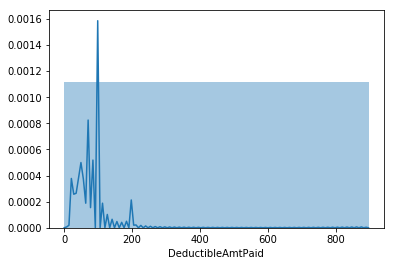

In [25]:
sns.distplot(tr_out.DeductibleAmtPaid, bins=1)

In [ ]:
sns.scatterplot(x=tr_out.Provider, y=tr_out.Inpatient)

##freeze

## Concat Intpaient and Outpatient

In [34]:
tr_inout = pd.concat([tr_in, tr_out], join="inner", axis=0)
print("Rows: {}".format(len(tr_inout)))
print("Columns: {}".format(len(tr_inout.columns)))
tr_inout

Rows: 558211
Columns: 29


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Inpatient,Outpatient
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,6186,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,78321,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1,0
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,1749,...,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,1,0
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,5699,...,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN,1,0
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,78605,...,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,1,0
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,41401,...,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN,1,0


In [35]:
tr_inout.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Inpatient', 'Outpatient'],
      dtype='object')

In [36]:
tr_inout = pd.concat([tr_in, tr_out], join="outer", axis=0)
print("Rows: {}".format(len(tr_inout)))
print("Columns: {}".format(len(tr_inout.columns)))
tr_inout

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Rows: 558211
Columns: 32


,AdmissionDt,AttendingPhysician,BeneID,ClaimEndDt,ClaimID,ClaimStartDt,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,...,ClmProcedureCode_6,DeductibleAmtPaid,DiagnosisGroupCode,DischargeDt,Inpatient,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,Outpatient,Provider
0,2009-04-12,PHY390922,BENE11001,2009-04-18,CLM46614,2009-04-12,7866,1970,NaN,4019,...,NaN,1068.0,201,2009-04-18,1,26000,NaN,NaN,0,PRV55912
1,2009-08-31,PHY318495,BENE11001,2009-09-02,CLM66048,2009-08-31,6186,6186,NaN,2948,...,NaN,1068.0,750,2009-09-02,1,5000,PHY318495,NaN,0,PRV55907
2,2009-09-17,PHY372395,BENE11001,2009-09-20,CLM68358,2009-09-17,29590,29623,NaN,30390,...,NaN,1068.0,883,2009-09-20,1,5000,NaN,PHY324689,0,PRV56046
3,2009-02-14,PHY369659,BENE11011,2009-02-22,CLM38412,2009-02-14,431,43491,NaN,2762,...,NaN,1068.0,067,2009-02-22,1,5000,PHY392961,PHY349768,0,PRV52405
4,2009-08-13,PHY379376,BENE11014,2009-08-30,CLM63689,2009-08-13,78321,042,NaN,3051,...,NaN,1068.0,975,2009-08-30,1,10000,PHY398258,NaN,0,PRV56614
5,2009-10-06,PHY402711,BENE11017,2009-10-12,CLM70950,2009-10-06,1749,1745,NaN,V4571,...,NaN,1068.0,597,2009-10-12,1,8000,PHY402711,PHY402711,0,PRV54986
6,2009-01-02,PHY412314,BENE11018,2009-01-07,CLM32075,2009-01-02,5699,1536,NaN,73300,...,NaN,1068.0,390,2009-01-07,1,8000,PHY347494,NaN,0,PRV54090
7,2009-08-03,PHY346286,BENE11028,2009-08-07,CLM62376,2009-08-03,78605,56212,NaN,25000,...,NaN,1068.0,379,2009-08-07,1,6000,PHY405514,NaN,0,PRV51148
8,2009-08-06,PHY385030,BENE11031,2009-08-09,CLM62784,2009-08-06,2859,42823,NaN,4280,...,NaN,1068.0,294,2009-08-09,1,7000,NaN,NaN,0,PRV55839
9,2008-12-29,PHY355604,BENE11034,2009-01-05,CLM31519,2008-12-29,41401,41041,NaN,3669,...,NaN,1068.0,262,2009-01-05,1,29000,PHY415867,NaN,0,PRV55215


In [37]:
tr_inout.columns

Index(['AdmissionDt', 'AttendingPhysician', 'BeneID', 'ClaimEndDt', 'ClaimID',
       'ClaimStartDt', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'DischargeDt', 'Inpatient',
       'InscClaimAmtReimbursed', 'OperatingPhysician', 'OtherPhysician',
       'Outpatient', 'Provider'],
      dtype='object')

In [33]:
print("In: {} + Out: {}".format((len(tr_in)), (len(tr_out))))
print(len(tr_in) + len(tr_out))

In: 40474 + Out: 517737
558211


In [32]:
print(len(tr_inout.columns))
tr_inout.columns

32


Index(['AdmissionDt', 'AttendingPhysician', 'BeneID', 'ClaimEndDt', 'ClaimID',
       'ClaimStartDt', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_10', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'DischargeDt', 'Inpatient',
       'InscClaimAmtReimbursed', 'OperatingPhysician', 'OtherPhysician',
       'Outpatient', 'Provider'],
      dtype='object')

In [38]:
len(tr_inout.Provider.unique())

5410

In [39]:
len(tr_inout.BeneID.unique())

138556

In [41]:
tr_inout.BeneID.nunique()

138556

In [42]:
tr_inout.describe()

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,Inpatient,InscClaimAmtReimbursed,Outpatient
count,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,557312.000000,558211.000000,558211.000000,558211.000000
mean,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,78.421085,0.072507,997.012133,0.927493
std,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,274.016812,0.259325,3821.534891,0.259325
min,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,0.000000,0.000000,40.000000,1.000000
50%,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,0.000000,0.000000,80.000000,1.000000
75%,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,0.000000,0.000000,300.000000,1.000000
max,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,1068.000000,1.000000,125000.000000,1.000000


### multiple claims

In [46]:
df = tr_inout[["BeneID", "ClaimID"]]
df.head(10)

,BeneID,ClaimID
0,BENE11001,CLM46614
1,BENE11001,CLM66048
2,BENE11001,CLM68358
3,BENE11011,CLM38412
4,BENE11014,CLM63689
5,BENE11017,CLM70950
6,BENE11018,CLM32075
7,BENE11028,CLM62376
8,BENE11031,CLM62784
9,BENE11034,CLM31519


In [50]:
df_p = df.groupby('BeneID')['ClaimID'].nunique().sort_values(ascending=False)
df_p.head(15)

BeneID
BENE59303     29
BENE42721     29
BENE118316    29
BENE44241     28
BENE36330     28
BENE80977     28
BENE87248     27
BENE40202     27
BENE63544     27
BENE63504     27
BENE143400    27
BENE135580    26
BENE122118    26
BENE126421    26
BENE111593    26
Name: ClaimID, dtype: int64

In [53]:
len(df_p)

138556

In [ ]:
sns.scatterplot(x=df_p.index, y=df_p.values)

In [ ]:
sns.barplot(df_p.values, df_p.index, alpha=0.8)
plt.title('Title')
plt.xlabel('X', fontsize=12)
plt.ylable('Y', fontsize=12)
plt.show()

## misc

In [61]:
tr_inout.fillna(0)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Inpatient,Outpatient
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,0,0,7866,...,5849,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,0,6186,...,0,0,7092.0,0.0,0.0,0.0,0.0,0.0,1,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,0,PHY324689,29590,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,4019,0,331.0,0.0,0.0,0.0,0.0,0.0,1,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,0,78321,...,20300,0,3893.0,0.0,0.0,0.0,0.0,0.0,1,0
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,1749,...,25002,0,863.0,0.0,0.0,0.0,0.0,0.0,1,0
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,0,5699,...,56210,0,4576.0,0.0,0.0,0.0,0.0,0.0,1,0
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,0,78605,...,41401,0,9904.0,0.0,0.0,0.0,0.0,0.0,1,0
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,0,0,2859,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,0,41401,...,4589,0,3612.0,4139.0,0.0,0.0,0.0,0.0,1,0


ValueError: max must be larger than min in range parameter.

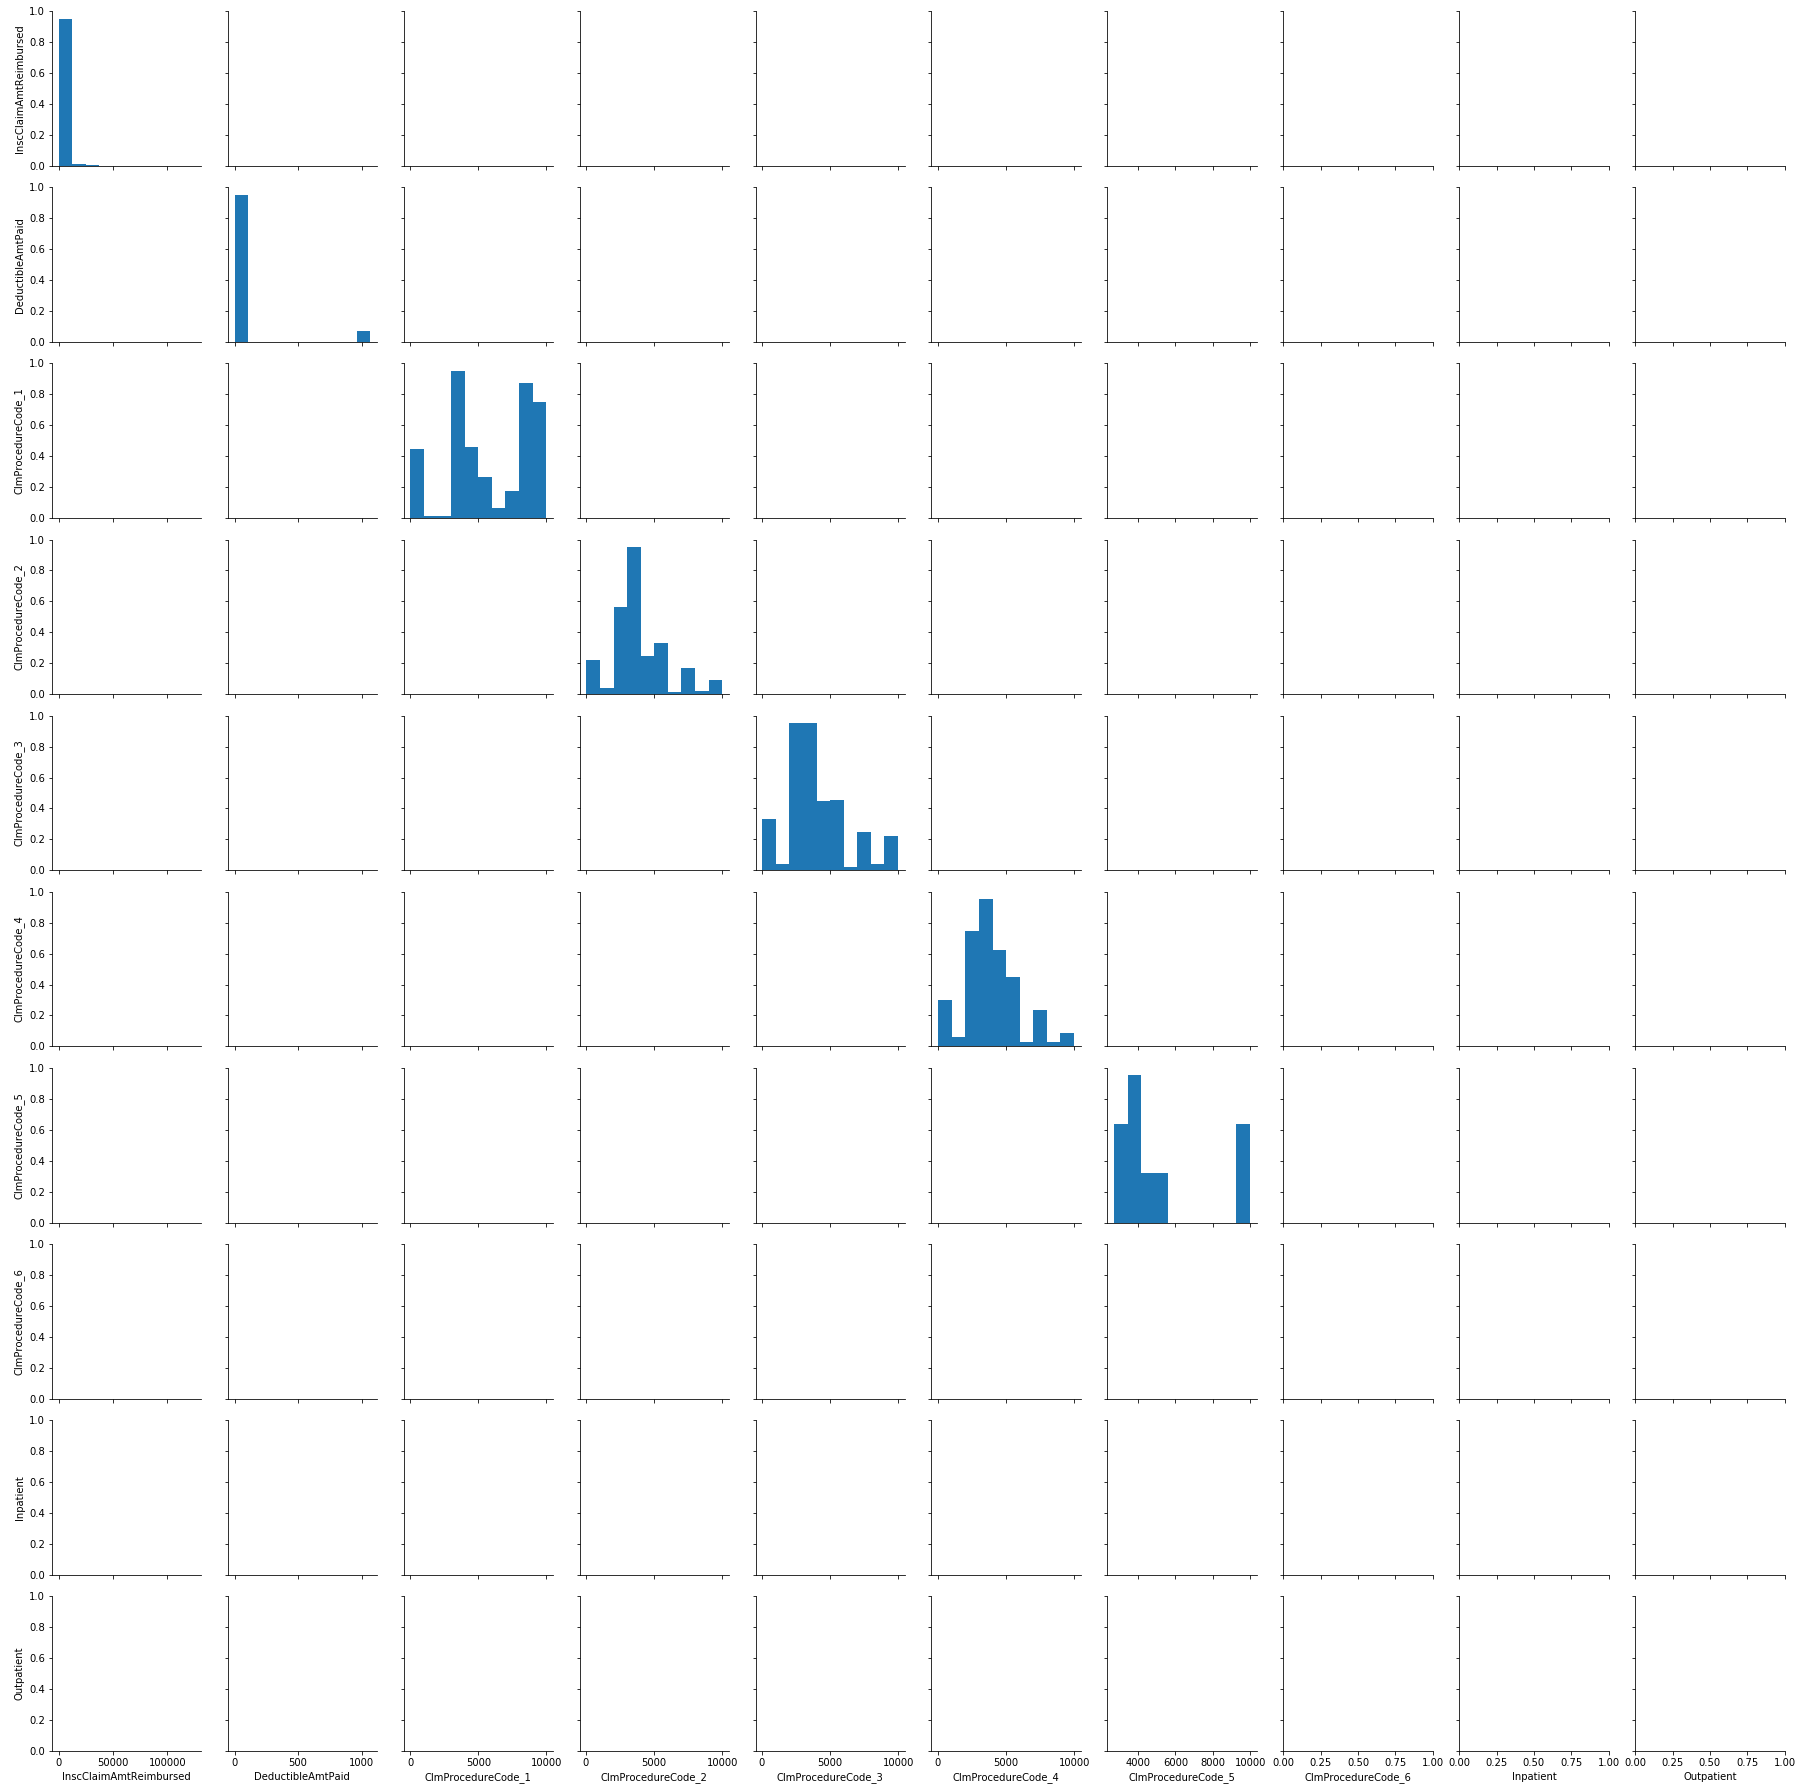

In [62]:
sns.pairplot(tr_inout)

In [57]:
tr_inout.corr()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Inpatient,Outpatient
InscClaimAmtReimbursed,1.000000,0.665488,-0.145059,0.108619,0.136799,-0.080588,0.662121,NaN,0.665122,-0.665122
DeductibleAmtPaid,0.665488,1.000000,-0.006736,-0.010818,0.036194,-0.000524,NaN,NaN,0.998457,-0.998457
ClmProcedureCode_1,-0.145059,-0.006736,1.000000,0.028000,0.051397,0.072560,0.727110,NaN,-0.006046,0.006046
ClmProcedureCode_2,0.108619,-0.010818,0.028000,1.000000,0.028871,0.097080,0.652015,NaN,-0.015874,0.015874
ClmProcedureCode_3,0.136799,0.036194,0.051397,0.028871,1.000000,0.119042,-0.129384,NaN,0.035629,-0.035629
ClmProcedureCode_4,-0.080588,-0.000524,0.072560,0.097080,0.119042,1.000000,0.300858,NaN,-0.000339,0.000339
ClmProcedureCode_5,0.662121,NaN,0.727110,0.652015,-0.129384,0.300858,1.000000,NaN,NaN,NaN
ClmProcedureCode_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inpatient,0.665122,0.998457,-0.006046,-0.015874,0.035629,-0.000339,NaN,NaN,1.000000,-1.000000
Outpatient,-0.665122,-0.998457,0.006046,0.015874,-0.035629,0.000339,NaN,NaN,-1.000000,1.000000


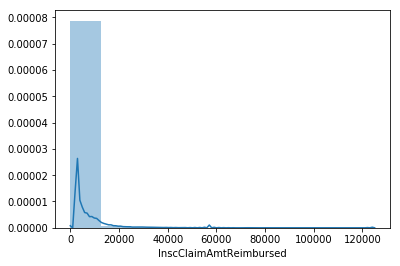

In [69]:
sns.distplot(tr_inout.InscClaimAmtReimbursed, bins=10)

/Users/fhel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/fhel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


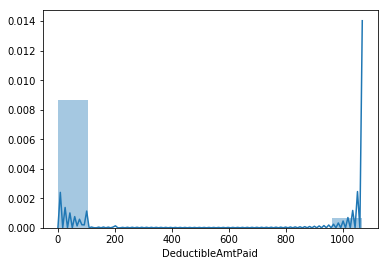

In [71]:
sns.distplot(tr_inout.DeductibleAmtPaid, bins=10)

In [ ]:
sns.scatterplot(x=tr_inout['BeneID'], y=tr_inout.AttendingPhysician)